In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Introduction¶
In the realm of cybersecurity and network intrusion detection, the NSL-KDD dataset stands as a benchmark for evaluating machine learning models' performance. This dataset, derived from the original KDD Cup 1999 dataset, addresses the limitations and biases present in its predecessor, making it a vital resource for researchers and practitioners in the field of Intrusion Detection System (IDS).

# 2. Read data

In [126]:
df = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt")
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.1. Add columns name

In [127]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.2. Describe

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

> df không chứa giá trị null

In [129]:
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


# 3. Visual

> add boolean columns is_attack

In [130]:
df['is_attack'] = df['attack'] != 'normal'
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,is_attack
0,0,udp,other,SF,146,0,0,0,0,0,...,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15,False
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19,True
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21,False
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21,False
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21,True


# 3.1. General

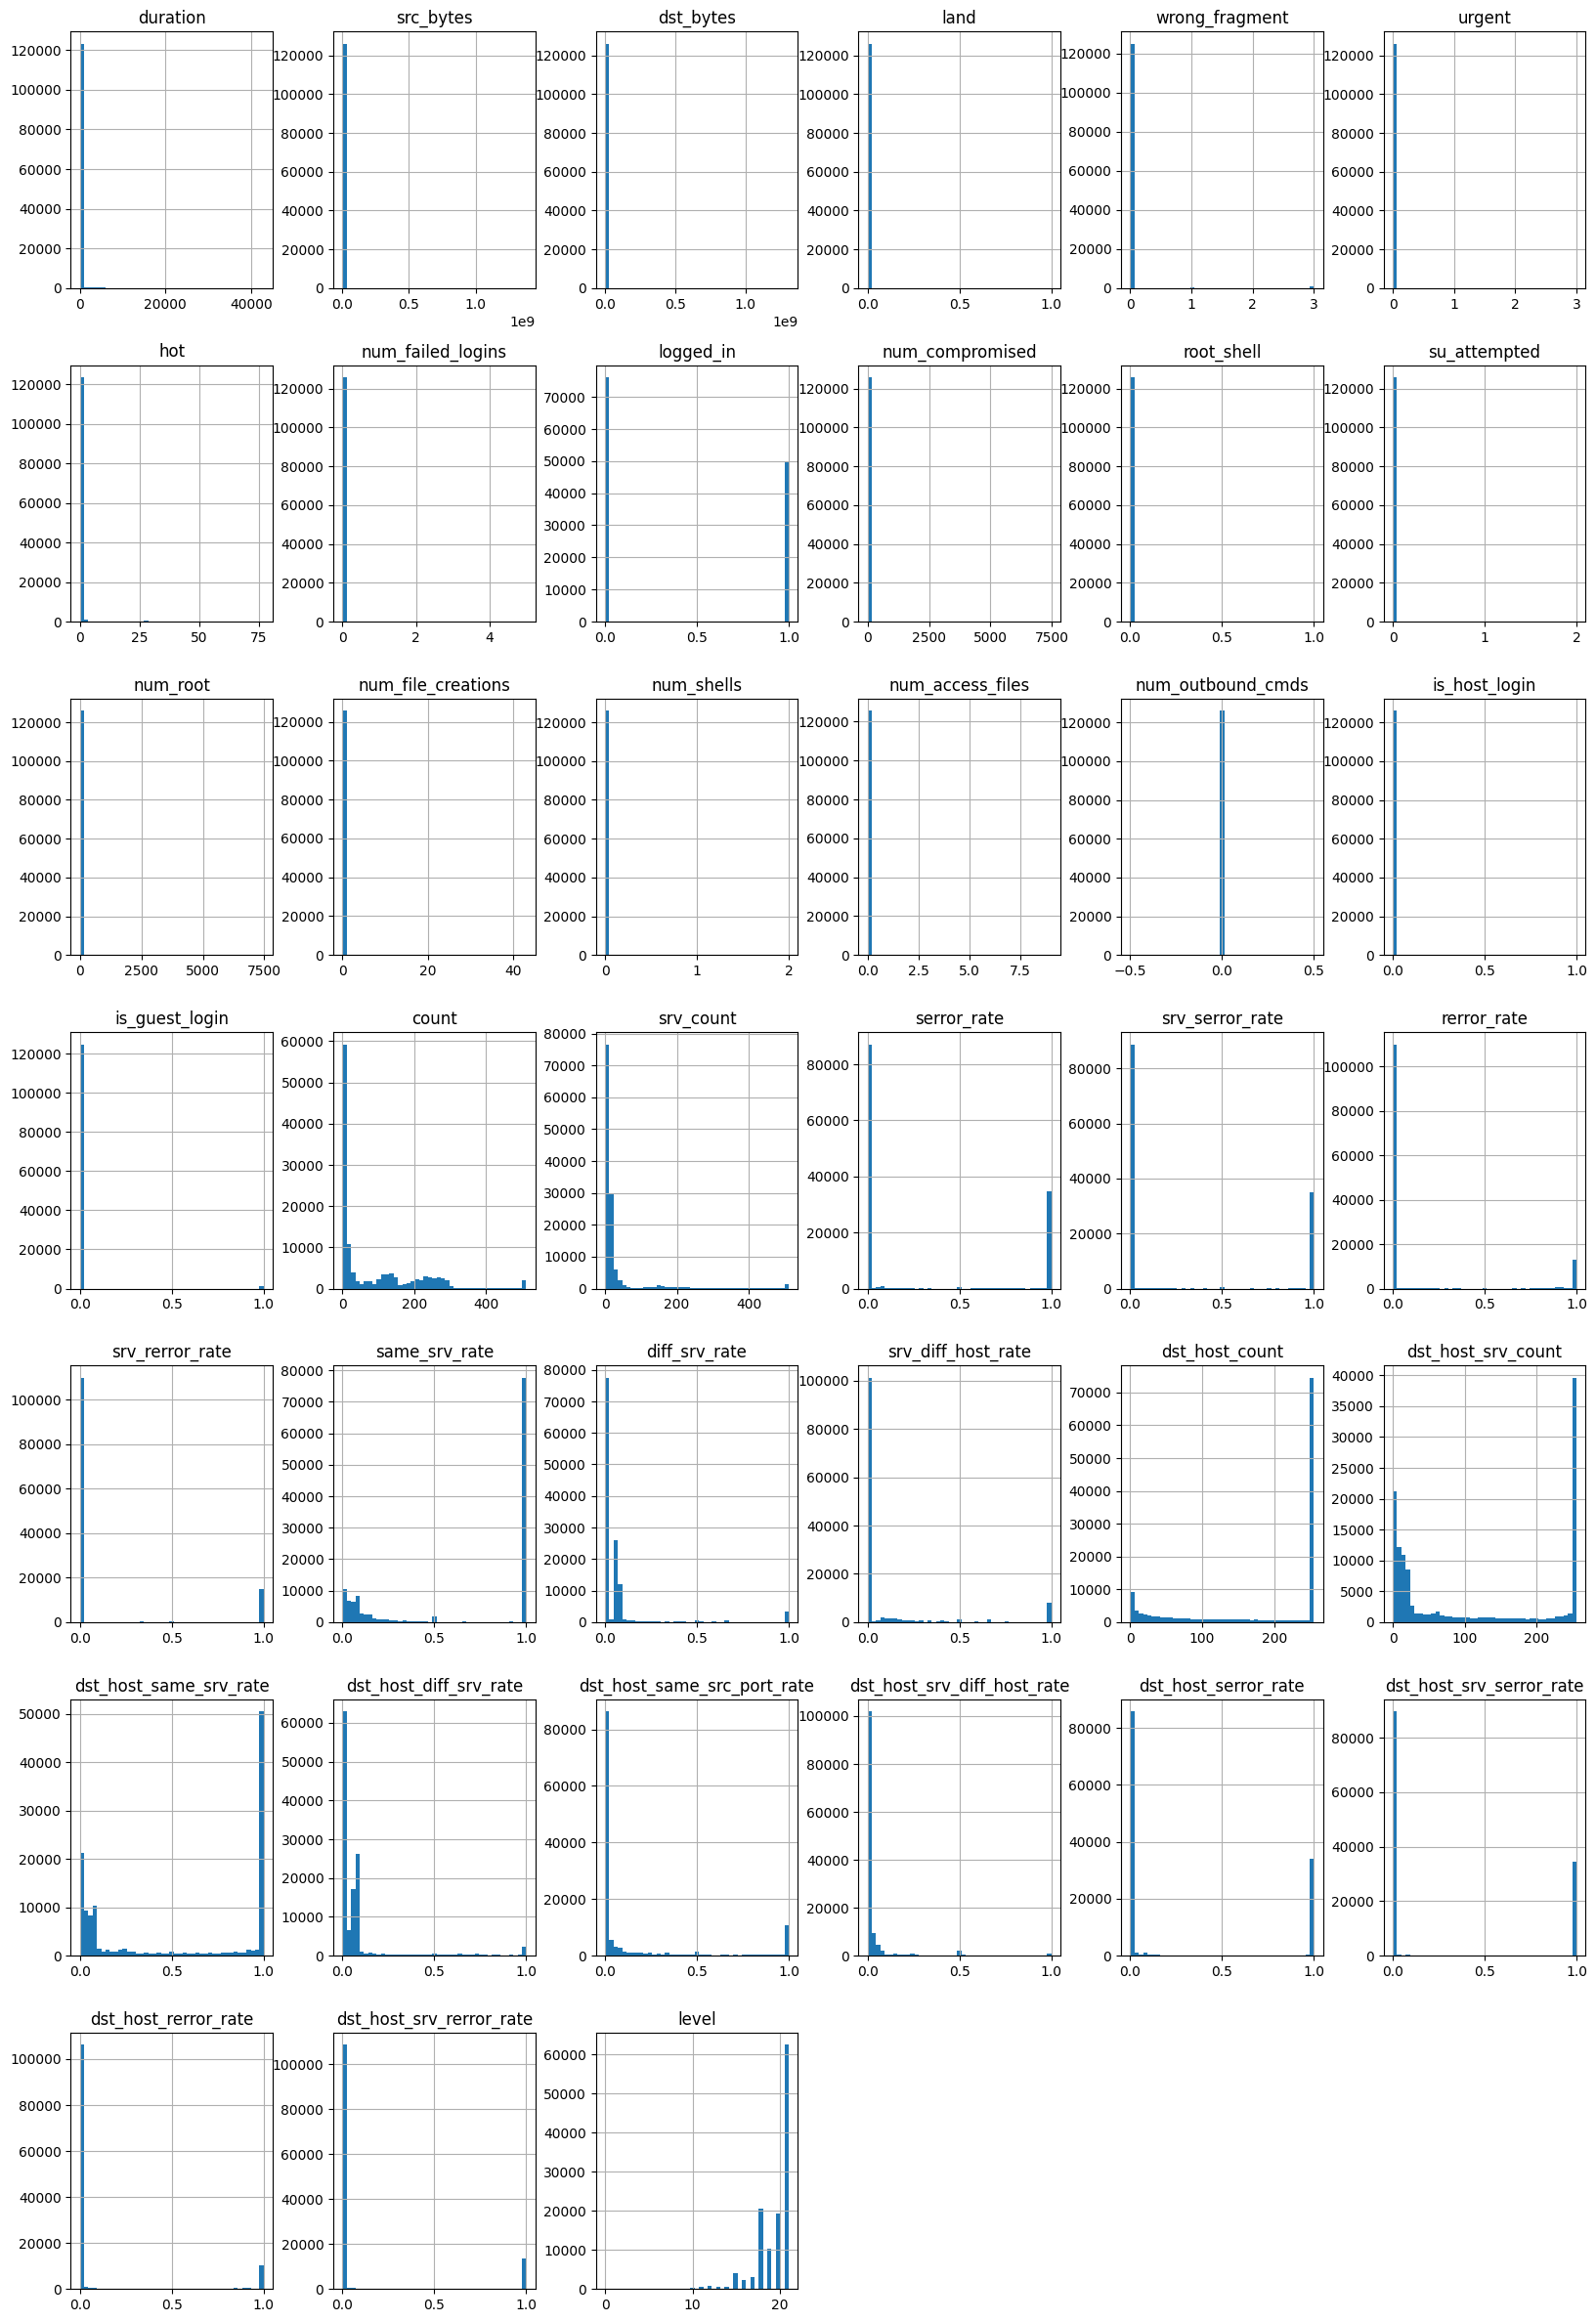

In [131]:
df.hist(bins=43,figsize=(20,30));

# Protocol Type

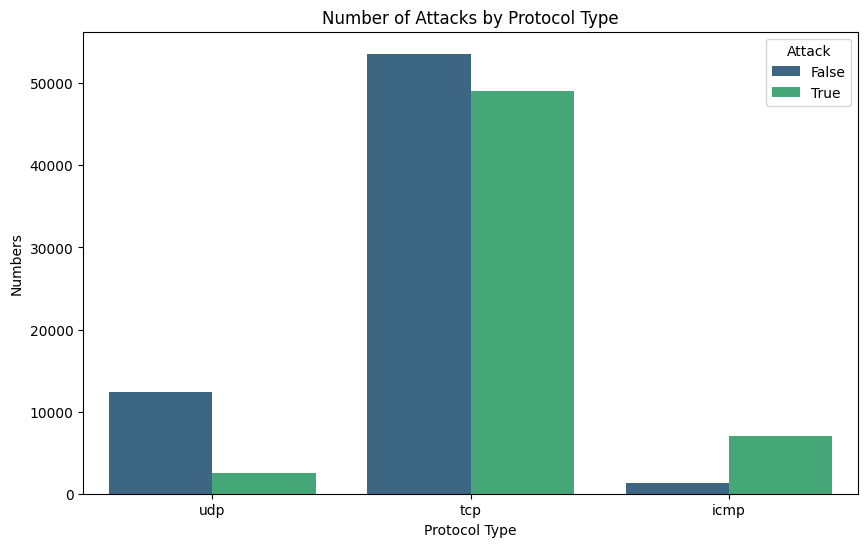

In [132]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='protocol_type', hue='is_attack', palette='viridis')
plt.title('Number of Attacks by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Numbers')
plt.legend(title='Attack')
plt.show()

# Service used

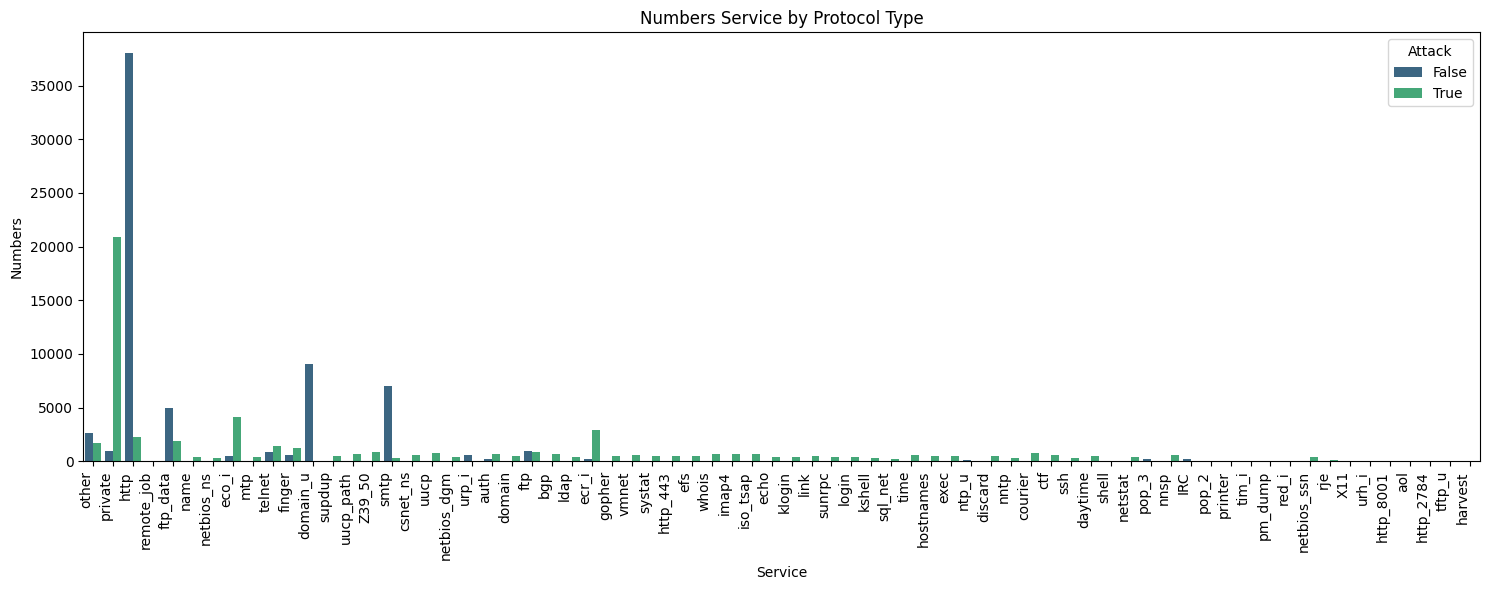

In [133]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='service', hue='is_attack', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.title('Numbers Service by Protocol Type')
plt.xlabel('Service')
plt.ylabel('Numbers')
plt.legend(title='Attack')
plt.tight_layout()
plt.show()

> Private attack is common

# Heat map corr

In [134]:
df_numberics = df.select_dtypes(include=['number'])
df_numberics.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,146,0,0,0,0,0,0,0,0,...,1,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,15
1,0,0,0,0,0,0,0,0,0,0,...,26,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,19
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,21
3,0,199,420,0,0,0,0,0,1,0,...,255,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,21
4,0,0,0,0,0,0,0,0,0,0,...,19,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,21


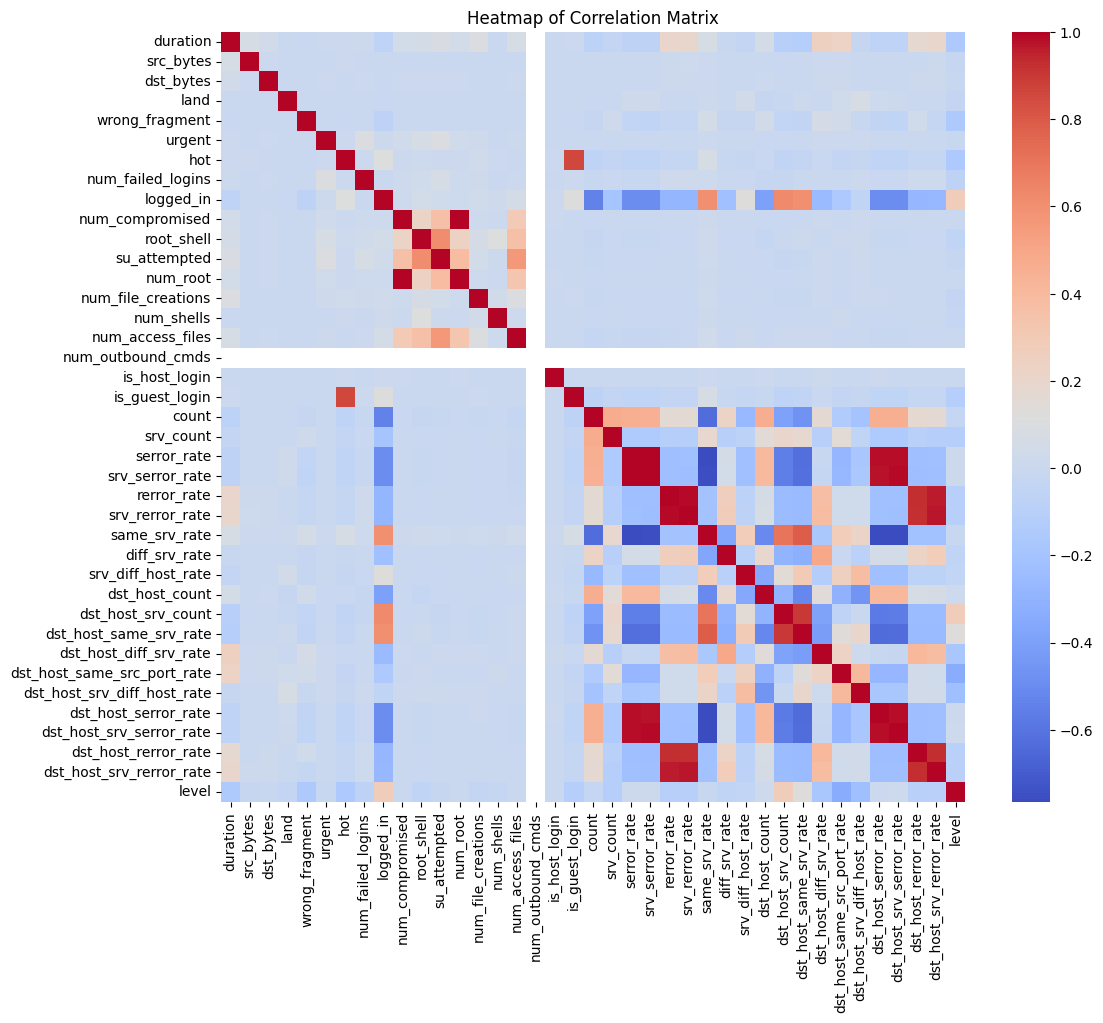

In [135]:
corr_matrix = df_numberics.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [136]:
corr_matrix = corr_matrix.abs()

# Đặt ngưỡng
threshold = 0.95

# Lấy ma trận tam giác trên của ma trận tương quan
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Tìm các cặp biến có hệ số tương quan lớn hơn ngưỡng
high_corr_var = []
for column in upper.columns:
    for row in upper.index:
        if upper.loc[row, column] > threshold:
            high_corr_var.append((row, column, upper.loc[row, column]))

# Chuyển danh sách thành DataFrame để dễ dàng xem xét
high_corr_df = pd.DataFrame(high_corr_var, columns=['Biến 1', 'Biến 2', 'Hệ số tương quan'])
to_drop = high_corr_df['Biến 1'].tolist()

# Sắp xếp theo giá trị tương quan giảm dần
high_corr_df = high_corr_df.sort_values(by='Hệ số tương quan', ascending=False)

# Hiển thị các cặp biến có hệ số tương quan cao hơn ngưỡng
print(high_corr_df)

print(to_drop)

                 Biến 1                    Biến 2  Hệ số tương quan
0       num_compromised                  num_root             0.999
1           serror_rate           srv_serror_rate             0.993
2           rerror_rate           srv_rerror_rate             0.989
6       srv_serror_rate  dst_host_srv_serror_rate             0.986
7  dst_host_serror_rate  dst_host_srv_serror_rate             0.985
5           serror_rate  dst_host_srv_serror_rate             0.981
3           serror_rate      dst_host_serror_rate             0.979
4       srv_serror_rate      dst_host_serror_rate             0.978
9       srv_rerror_rate  dst_host_srv_rerror_rate             0.970
8           rerror_rate  dst_host_srv_rerror_rate             0.964
['num_compromised', 'serror_rate', 'rerror_rate', 'serror_rate', 'srv_serror_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'rerror_rate', 'srv_rerror_rate']


In [137]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print(constant_columns)


['num_outbound_cmds']


In [138]:
to_drop.extend(constant_columns)
print(to_drop)

['num_compromised', 'serror_rate', 'rerror_rate', 'serror_rate', 'srv_serror_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'num_outbound_cmds']


In [139]:
df.drop(columns=to_drop, inplace=True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,is_attack
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,normal,15,False
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,0.000,0.000,neptune,19,True
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.010,0.000,0.010,normal,21,False
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21,False
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,1.000,1.000,neptune,21,True


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  root_shell                   125972 non-null  int64  
 13 

# 4. Modelling

In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# 4.1. Setup enviroments

In [142]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)

    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Number of replicas: 1


In [143]:
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
# except ValueError:
#     tpu = None
#     gpus = tf.config.experimental.list_logical_devices("GPU")

# if tpu:
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.experimental.TPUStrategy(tpu,)
#     print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# elif len(gpus) > 1:
#     strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
#     print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
# elif len(gpus) == 1:
#     strategy = tf.distribute.get_strategy()
#     print('Running on single GPU ', gpus[0].name)
# else:
#     strategy = tf.distribute.get_strategy()
#     print('Running on CPU')
# print("Number of accelerators: ", strategy.num_replicas_in_sync)

# 4.2. Data

In [144]:
# Định nghĩa các cột đặc trưng và biến mục tiêu
X = df.drop(columns=['attack', 'is_attack'], axis=1)
y = df['attack']

# Xác định các cột số và cột phân loại
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Khởi tạo LabelEncoder cho biến mục tiêu
le_target = LabelEncoder()
# Mã hóa biến mục tiêu
y_encoded = le_target.fit_transform(y)

# Transformer cho các cột số
numerical_transformer = MinMaxScaler()

# Transformer cho các cột phân loại
categorical_transformer = OrdinalEncoder()

# Kết hợp các bước tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Tạo pipeline tiền xử lý
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Mã hóa đặc trưng
X_processed = pipeline.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)

Training shapes: (100777, 35) (100777,)
Testing shapes: (25195, 35) (25195,)


# 4.3. Build

In [145]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 23


In [146]:
with strategy.scope():
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 23)             │           759 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,703 (61.34 KB)

 Trainable params: 15,703 (61.34 KB)

 Non-trainable params: 0 (0.00 B)

# 4.4. Compile

In [147]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# 4.5. Trainning

In [148]:
# Thiết lập callback để ngăn ngừa overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=2048,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.0645 - loss: 8.0646 - val_accuracy: 0.5344 - val_loss: 1.8836
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3600 - loss: 2.3411 - val_accuracy: 0.5687 - val_loss: 1.3977
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5035 - loss: 1.8138 - val_accuracy: 0.7236 - val_loss: 1.2305
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5849 - loss: 1.5543 - val_accuracy: 0.7566 - val_loss: 1.0279
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6554 - loss: 1.3019 - val_accuracy: 0.8230 - val_loss: 0.8412
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 1.1007 - val_accuracy: 0.8538 - val_loss: 0.5831
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.8800 - val_accuracy: 0.8552 - val_loss: 0.4899
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.7430 - val_accuracy: 0.8569 -

# 4.6. Evaluation

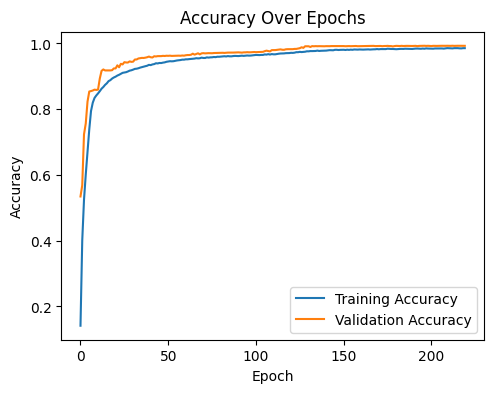

In [149]:
# Độ chính xác
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

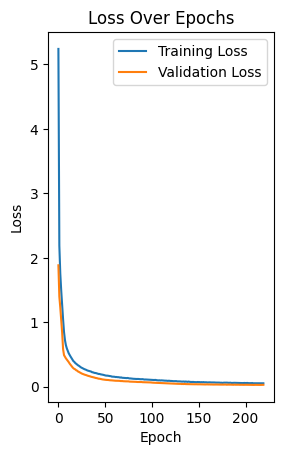

In [150]:
# Mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [151]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0271
Test Accuracy: 0.9935


# 4.7. Save Model

In [152]:
model.save('neural_network_model.h5')

# 4.8. Attack or not

In [153]:
# Định nghĩa các cột đặc trưng và biến mục tiêu
X = df.drop(columns=['attack', 'is_attack'], axis=1)
y = df['is_attack']

# Xác định các cột số và cột phân loại
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Khởi tạo LabelEncoder cho biến mục tiêu
le_target = LabelEncoder()
# Mã hóa biến mục tiêu
y_encoded = le_target.fit_transform(y)

# Transformer cho các cột số
numerical_transformer = MinMaxScaler()

# Transformer cho các cột phân loại
categorical_transformer = OrdinalEncoder()

# Kết hợp các bước tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Tạo pipeline tiền xử lý
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Mã hóa đặc trưng
X_processed = pipeline.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


print("Training shapes:", X_train.shape, y_train.shape)
print("Testing shapes:", X_test.shape, y_test.shape)

Training shapes: (100777, 35) (100777,)
Testing shapes: (25195, 35) (25195,)


In [154]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 2


In [155]:
with strategy.scope():
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 64)             │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,450 (17.38 KB)

 Trainable params: 4,450 (17.38 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Thiết lập callback để ngăn ngừa overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=2048,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5905 - loss: 0.9156 - val_accuracy: 0.8802 - val_loss: 0.3399
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.2993 - val_accuracy: 0.9529 - val_loss: 0.2071
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1913 - val_accuracy: 0.9552 - val_loss: 0.1511
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9548 - loss: 0.1469 - val_accuracy: 0.9543 - val_loss: 0.1252
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1216 - val_accuracy: 0.9590 - val_loss: 0.1077
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9635 - loss: 0.1052 - val_accuracy: 0.9668 - val_loss: 0.0964
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.0913 - val_accuracy: 0.9730 - val_loss: 0.0861
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.0795 - val_accuracy: 0.9748 - 

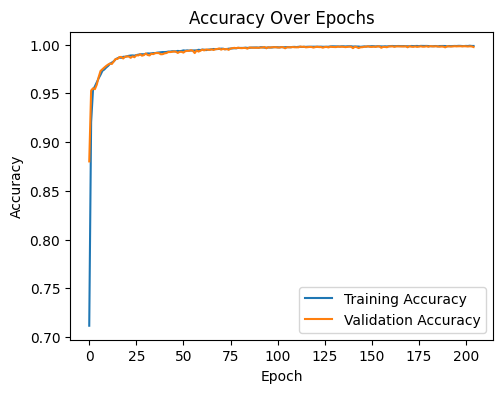

In [157]:
# Độ chính xác
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

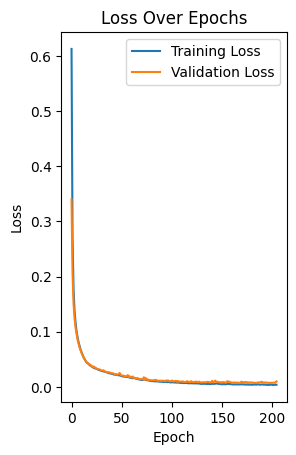

In [158]:
# Mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [159]:
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0080
Test Accuracy: 0.9982
